In [30]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In order to understand how to get to the CMB power spectrum, let us first recall the definition of the spherical harmonics transform of the CMB temperature field
$$ T(\hat{n})=\sum_{\ell m}a_{\ell m}Y_{\ell m}(\hat{n}) $$
The CMB power spectrum, on the other hand, is simply defined as the expectation value of the square of the spherical harmonics coefficients
$$ C_{\ell} \equiv \langle |a_{\ell m}^2| \rangle = \langle a_{\ell m}a^*_{\ell m} \rangle $$
Note that, in principle, this function should have two subscripts, $C_{\ell m}$, but because we assume that the universe is isotropic, it must have the same power spectrum towards both the x, y and z directions, and this implies full rotational invariance. As a result, there is no $m$ dependence in the power spectrum, and we simply average over $m$, and only call the spectrum $C_{\ell}$.

In [31]:
h = 0.67810
ob = 0.02238280
ocdm = 0.1201075

In [32]:
common_settings = {# LambdaCDM parameters
                   'h':h,
                   'omega_b':ob,
                   'omega_cdm': ocdm,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}
l_max_scalars = 3000

In [49]:
cosmo = Class()
cosmo.set(common_settings)
cosmo.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
cosmo.compute()

In [51]:
cl_tot = cosmo.raw_cl(l_max_scalars)
cl_tot.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

The power spectrum is most often plotted in units of $\ell(\ell+1)/2\pi$ in $\mu K^2$, because it's overall trend is to drop as $\ell^2$. It is therefore easier to see features when plotted in these units, i.e. we multiply $C_{\ell}$ by $\frac{\ell(\ell+1)}{2\pi}(10^6T_{CMB0})^2$

In [52]:
ell = cl_tot['ell']
pi = np.pi
factor = (10**12)*ell*(ell+1.)/(2*pi)

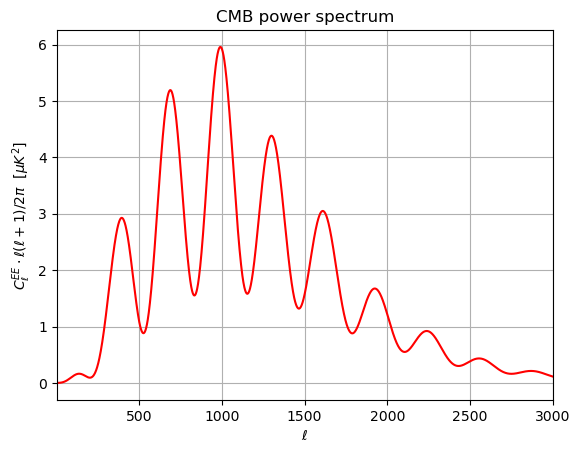

In [53]:
plt.xlim([2,3000])
plt.plot(ell,factor*cl_tot['ee'], color='r')
plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title('CMB power spectrum')
plt.grid(True)

 I don't know if this is correct